In [1]:
import glob
import tables as tb
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import invisible_cities.io.dst_io as dio

from utils.labelling_utils import hit_data_cuts
from utils.histogram_utils import container_creator, bin_creator

# EFICIENCIAS DEL FIDUCIAL CUT RMAX=198 (MARIJA)

Primero tenemos aquí los datos de 2 y 4mm sin haber pasado ningún corte. En ellos encontramos los hits MC, los voxeles MC y los voxeles beersheba. Faltarían los hits beersheba, que por no fuchicar en las funciones ya hechas podemos sacarlos de los ficheros originales y aplicarles los cortes a mano.

Primero pruebo con un fiducial de Rmax = 198 como tenía Marija y eliminando solo los hits q caen fuera (esta es la función que hace el corte), luego voxelizando esos hits (tanto para MC como para beersheba). Es decir, tengo unos datos producidos de 2 y 4 mm en z con y sin fiducial cut para comparar.

Veo que hay un corte hecho por Marija en el volumen del detector en x e y, pero entiendo que simplemente es una cosa para reducir el tamaño de las imágenes teniendo en cuenta que el fiducial cut ya reduce ese trozo!! Rollo pone por ejemplo de -200 a 200 cuando el fiducial cut al ser de radio 198 nunca va a superar ese segmento!! Yo tengo de -220 a 220, son unos 40 mm que nos ahorramos :)

In [6]:
path_2mm = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_2mm.h5'
path_3mm = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_3mm.h5'
path_4mm = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_4mm.h5'

In [7]:
MC_hits_2mm       = dio.load_dst(path_2mm, 'DATASET', 'MCHits')
MC_voxels_2mm     = dio.load_dst(path_2mm, 'DATASET', 'MCVoxels')
beersh_voxels_2mm = dio.load_dst(path_2mm, 'DATASET', 'BeershebaVoxels')
#binsInfo_2mm = dio.load_dst(path_2mm, 'DATASET', 'BinsInfo')

In [8]:
MC_hits_3mm       = dio.load_dst(path_3mm, 'DATASET', 'MCHits')
MC_voxels_3mm     = dio.load_dst(path_3mm, 'DATASET', 'MCVoxels')
beersh_voxels_3mm = dio.load_dst(path_3mm, 'DATASET', 'BeershebaVoxels')
#binsInfo_3mm = dio.load_dst(path_3mm, 'DATASET', 'BinsInfo')

In [9]:
MC_hits_4mm       = dio.load_dst(path_4mm, 'DATASET', 'MCHits')
MC_voxels_4mm     = dio.load_dst(path_4mm, 'DATASET', 'MCVoxels')
beersh_voxels_4mm = dio.load_dst(path_4mm, 'DATASET', 'BeershebaVoxels')
#binsInfo_4mm = dio.load_dst(path_4mm, 'DATASET', 'BinsInfo')

In [10]:
path_2mm_cut = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_2mm_fiducial.h5'
path_3mm_cut = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_3mm_fiducial.h5'
path_4mm_cut = '/Users/mperez/NEXT/data_labelling/examples/prueba_cut24_all_4mm_fiducial.h5'

In [11]:
MC_hits_2mm_cut       = dio.load_dst(path_2mm_cut, 'DATASET', 'MCHits')
MC_voxels_2mm_cut     = dio.load_dst(path_2mm_cut, 'DATASET', 'MCVoxels')
beersh_voxels_2mm_cut = dio.load_dst(path_2mm_cut, 'DATASET', 'BeershebaVoxels')
#binsInfo_2mm_cut = dio.load_dst(path_2mm_cut, 'DATASET', 'BinsInfo')

In [12]:
MC_hits_3mm_cut       = dio.load_dst(path_3mm_cut, 'DATASET', 'MCHits')
MC_voxels_3mm_cut     = dio.load_dst(path_3mm_cut, 'DATASET', 'MCVoxels')
beersh_voxels_3mm_cut = dio.load_dst(path_3mm_cut, 'DATASET', 'BeershebaVoxels')
#binsInfo_3mm_cut = dio.load_dst(path_3mm_cut, 'DATASET', 'BinsInfo')

In [13]:
MC_hits_4mm_cut       = dio.load_dst(path_4mm_cut, 'DATASET', 'MCHits')
MC_voxels_4mm_cut     = dio.load_dst(path_4mm_cut, 'DATASET', 'MCVoxels')
beersh_voxels_4mm_cut = dio.load_dst(path_4mm_cut, 'DATASET', 'BeershebaVoxels')
#binsInfo_4mm = dio.load_dst(path_4mm, 'DATASET', 'BinsInfo')

# ELIMINANDO SOLO HITS

## 2mm (MC hits, voxeles MC y beersheba)

In [37]:
print('MC hits    ratio after cut', len(MC_hits_2mm_cut)/len(MC_hits_2mm))
print('MC voxels  ratio after cut', len(MC_voxels_2mm_cut)/len(MC_voxels_2mm))
print('Beersh vox ratio after cut', len(beersh_voxels_2mm_cut)/len(beersh_voxels_2mm))

MC hits    ratio after cut 0.9997825072977973
MC voxels  ratio after cut 0.9999868340208901
Beersh vox ratio after cut 0.9980227977738491


## 3mm (MC hits, voxeles MC y beersheba)

In [38]:
print('MC hits    ratio after cut', len(MC_hits_3mm_cut)/len(MC_hits_3mm))
print('MC voxels  ratio after cut', len(MC_voxels_3mm_cut)/len(MC_voxels_3mm))
print('Beersh vox ratio after cut', len(beersh_voxels_3mm_cut)/len(beersh_voxels_3mm))

MC hits    ratio after cut 0.9997825072977973
MC voxels  ratio after cut 0.9999946829722185
Beersh vox ratio after cut 0.9977531851782164


## 4mm (MC hits, voxeles MC y beersheba)

In [39]:
print('MC hits    ratio after cut', len(MC_hits_4mm_cut)/len(MC_hits_4mm))
print('MC voxels  ratio after cut', len(MC_voxels_4mm_cut)/len(MC_voxels_4mm))
print('Beersh vox ratio after cut', len(beersh_voxels_4mm_cut)/len(beersh_voxels_4mm))

MC hits    ratio after cut 0.9997825072977973
MC voxels  ratio after cut 0.9999880740837915
Beersh vox ratio after cut 0.9975410892684499


No se pq hago la diferencia de hits de 2 y 4 mm porque van a ser literalmente lo mismo, pero para voxeles sí cambia la cosa

Para los voxeles MC la eficiencia es ligeramente más alta que para los hits MC en ambos casos (pues algunos hits supongo que no hacen que el voxel se elimine!! pero algunos voxeles SI se eliminan). Luego, para los voxeles de beersheba aun baja más, lo cual tiene sentido ya que si se cortaban de MC, de beersheba iban a cortarse más porque se crea como una nube como ya sabemos!!

Notar que con 2mm perdemos menos voxeles... tiene sentido porque 2mm está más cerca de parecerse a hits que 4mm no sé si me explico

Pero bueno, veamos cómo es la eficiencia en hits de beersheba. Primero junto los hits de todos los ficheros del cut24 manualmente...

In [6]:
indir = '/Users/mperez/NEXT/bersh_prod/prod_example'
cut24_path = glob.glob(indir + "/*cut24.be*.h5")

In [7]:
beersheba_hits = pd.DataFrame()
start_id = 0
for i, path in enumerate(cut24_path):
    df = dio.load_dst(path, 'DECO', 'Events')
    event_id = df.event.unique()
    dct_map = {event_id[i] : i+start_id for i in range(len(event_id))}
    #añado identifier por cuando haga una función de fiducial cut por evento completo y no por hit, para buscarlo
    df = df.assign(dataset_id = df.event.map(dct_map))
    beersheba_hits = beersheba_hits.append(df)
    start_id += len(event_id)

In [8]:
beersheba_hits

,event,npeak,X,Y,Z,E,dataset_id
0,48000024,0,-1.5,134.5,256.377750,0.000233,0
1,48000024,0,-1.5,135.5,256.377750,0.000278,0
2,48000024,0,-0.5,134.5,256.377750,0.000429,0
3,48000024,0,-0.5,135.5,256.377750,0.000511,0
4,48000024,0,-0.5,136.5,256.377750,0.000257,0
...,...,...,...,...,...,...,...
2211842,48000618,3,43.5,-6.5,472.739875,0.000004,3058
2211843,48000618,3,43.5,-5.5,472.739875,0.000009,3058
2211844,48000618,3,43.5,-4.5,472.739875,0.000011,3058
2211845,48000618,3,43.5,-3.5,472.739875,0.000007,3058


In [9]:
def bins_from_dataset(path):
    binsInfo = dio.load_dst(path, 'DATASET', 'BinsInfo')
    voxel_size = (binsInfo.size_x.unique(), binsInfo.size_y.unique(), binsInfo.size_z.unique())
    total_size = (binsInfo.total_x.unique(), binsInfo.total_y.unique(), binsInfo.total_z.unique())
    start_bins = (binsInfo.min_x.unique(), binsInfo.min_y.unique(), binsInfo.min_z.unique())
    
    img  = container_creator(total_size, voxel_size)
    bins = bin_creator(img, steps = voxel_size, x0 = start_bins)
    return bins

In [10]:
bins_2mm = bins_from_dataset(path_2mm)
bins_3mm = bins_from_dataset(path_3mm)
bins_4mm = bins_from_dataset(path_4mm)

Quería hacer yo el corte con voxeles a mano pero por alguna razón las operaciones con las columnas de voxeles furrulan rarisimo, no entiendo nada al elevarlas al cuadrado y así hacen cosas que no deberían. Con hits va bien so no problem, puedo hacer el cut de beersheba yo a mano.

In [11]:
#MC_hits_2mm_cut       = hit_data_cuts(MC_hits_2mm, bins_2mm, Rmax = 198)
#MC_voxels_2mm_cut     = hit_data_cuts(MC_voxels_2mm, bins_2mm, Rmax = 198)
#beersh_voxels_2mm_cut = hit_data_cuts(beersh_voxels_2mm, bins_2mm, Rmax = 198, coords=['xbin', 'ybin', 'zbin'])
beersheba_hits_cut     = hit_data_cuts(beersheba_hits, bins_2mm, Rmax = 198, coords=['X', 'Y', 'Z'])

## Hits beersheba en general (2, 3 y 4mm)

In [12]:
print('Beersheba hits ratio after cut (for both 2, 3 and 4mm)', len(beersheba_hits_cut)/len(beersheba_hits))

Beersheba hits ratio after cut (for both 2, 3 and 4mm) 0.9972221590676963


La eficiencia eliminando solo hits es ALTÍSIMA en todos los casos, me quedaría mirar si esos eventos a los que elimino hits se les rompe mucho la forma, rollo se desconectan...

# ELIMINANDO EVENTOS ENTEROS QUE CAEN FUERA

Vale, hasta aquí nice, la eficiencia es ALTISIMA asi que no problem. Voy ahora a hacer el corte quitando el evento completo... obviamente será más baja porque no hay tantos eventos como hits (tengo menos estadística y a poco q saque bajará más). 

Miraremos la comparación de numero de eventos tras el corte respecto al numero de eventos original, pero tb el numero de hits tras este corte. Incluso podemos escoger el evento concreto pq vamos a saber cual es, y mirar que hits quedan fuera y que hits dentro!!! Completita la cosa

In [13]:
def hit_data_cuts_event(hits, bins, Rmax = np.nan, coords = ['x', 'y', 'z'], identifyer = 'dataset_id'):
    '''
    This function performs the fiducial and boundary cuts to the input hits.
    Args:
        hits: DATAFRAME
    Contains the hits information.
        bins: LIST OF ARRAYS
    Contains the desired bins in each coordinate.
        Rmax: NaN OR FLOAT
    Value to perform the fiducial cut of the hits. If NaN, the cut is not done.
        coords: LIST
    Title of the columns for the coordinates.
    RETURNS:
        hits_cut: DATAFRAME
    The same dataframe with the cut performed on the hits.
    
        hits_del: DATAFRAME
    Hits that were substracted from the initial hits because of the cut.
    
        hits_del_event: DATAFRAME
    The dataframe with only the events that pass the cut.
    '''

    #Creo el boundary cut (elimina hits fuera del tamaño del detector deseado)
    binsX, binsY, binsZ = bins
    boundary_cut = (hits[coords[0]]>=binsX.min()) & (hits[coords[0]]<=binsX.max())\
                 & (hits[coords[1]]>=binsY.min()) & (hits[coords[1]]<=binsY.max())\
                 & (hits[coords[2]]>=binsZ.min()) & (hits[coords[2]]<=binsZ.max())

    #Creo el fiducial cut (toma los hits dentro de cierto radio)
    if np.isnan(Rmax):
        fiducial_cut = pd.Series(np.ones(len(hits), dtype=bool)) #creates a mask with all trues
    else:
        fiducial_cut = (hits[coords[0]]**2+hits[coords[1]]**2)<Rmax**2
    
    
    #Finalmente escojo dichos hits
    hits_cut = hits[boundary_cut & fiducial_cut].reset_index(drop = True)
    
    #Y los hits eliminados
    hits_del = hits[~(boundary_cut & fiducial_cut)]
    
    #Y hago el df eliminando todos los hits de eventos que tengan algún hit fuera
    del_events = hits_del[identifyer].unique()
    hits_del_event = hits.copy()
    for i in del_events:
        hits_del_event = hits_del_event[~(hits_del_event.dataset_id == i)]
    assert len(del_events) + len(hits_del_event[identifyer].unique()) == len(hits[identifyer].unique())
    return hits_cut, hits_del, hits_del_event

In [14]:
beersheba_hits_cut, beersheba_hits_del, beersheba_hits_del_event = hit_data_cuts_event(beersheba_hits, 
                                                                                       bins_2mm, 
                                                                                       Rmax = 198, 
                                                                                       coords=['X', 'Y', 'Z'])

Primero miramos el ratio de eventos que sobreviven tras aplicar el corte en los hits de beersheba:

In [15]:
print('There are', len(beersheba_hits_del_event.dataset_id.unique()), 'events that survived out of', len(beersheba_hits.dataset_id.unique()), ', that is:')

There are 2470 events that survived out of 3059 , that is:


In [16]:
print('Event ratio after beersheba hits cut', len(beersheba_hits_del_event.dataset_id.unique()) / len(beersheba_hits.dataset_id.unique()))

Event ratio after beersheba hits cut 0.8074534161490683


Es decir, ~81% de eventos sobreviven al corte

Ahora miramos el ratio de hits que sobreviven tras eliminar todos los hits de los eventos que descartamos (y no solo los hits que quedaban fuera, como hicimos en apartados anteriores)

In [17]:
print('Hits ratio after beersheba hits event cut', len(beersheba_hits_del_event) / len(beersheba_hits))

Hits ratio after beersheba hits event cut 0.799678025160589


Y ~80% de los hits sobreviven tb al corte

Lo cual coincide aprox con el ratio de evento, es decir, tiene sentido q se mantengan las proporciones aprox porque en media pues cada evento tendrá un número parecido de hits etc

Como tenemos 399 cuts, y aprox hay ~3000 eventos por cut (PIENSO, PERO PUEDO MIRARLO MEJOR CUANDO ACCEDA AL CESGA NORMAL):

In [45]:
400 * 3000

1200000

In [46]:
400 * 3000 * len(beersheba_hits_del_event.dataset_id.unique()) / len(beersheba_hits.dataset_id.unique())

968944.099378882

Si hiciéramos corte de eventos completos, nos quedaríamos aprox con unos 966521 eventos igualmente

In [47]:
400 * 3000 * len(beersheba_hits_cut)/len(beersheba_hits)

1196666.5908812357

Si hiciéramos corte solo de hits, casi no perdemos como vemos...

# CONEXION TRAZAS 2MM, 3MM Y 4MM

## VOXELES MC 2MM, 3MM Y 4MM, COMPARACIÓN SIN CORTE

### Primero miraremos en los voxeles SIN CORTES, es decir, sólo la diferencia que hay entre las dos voxelizaciones distintas

Supongo q juntaré por evento los voxeles q tienen clase traza y blob, q debería estar siempre conectada. Luego por evento calcularé en número de elementos conectados q tiene y finalmente veré si coincide con el evento voxelizado de otra forma, o en la siguiente sección con el evento con cierto corte fiducial.

Primero lo hago con voxeles MC de 2 y 4 mm. Para voxeles beersheba supongo que añadiré que las clases vecinas de traza y blob tb cuenten pero no se si hace mucha falta pq en principio dentro de la nube de beersheba siempre va a ir contenida total o parcialmente la traza de MC... 

In [21]:
import networkx as nx
import itertools

In [22]:
def select_vox_by_segclass(df, segnums):
    selected_voxels = pd.DataFrame()
    for i in segnums:
        selected_voxels = selected_voxels.append(df[df.segclass == i])
    return selected_voxels

In [23]:
def create_track_nodes(nodes, other, max_distance = np.sqrt(3)):
    '''
    Appends to the list the voxels classified as other that are near track class, in order to achieve full
    connection in all the track (because sometimes the track has a other class voxel interrupting it so I'm
    trying here to join those voxels)
    '''
    new_nodes = []
    while nodes != new_nodes:
        new_nodes = nodes.copy()
        for va, vb in itertools.product(other, new_nodes):
            va_arr, vb_arr = np.array(va), np.array(vb)
            dis = np.linalg.norm(va_arr-vb_arr)
            if dis <= max_distance and nodes.count(va) == 0:
                nodes.append(va)
    return nodes

In [24]:
def count_connected_tracks(voxels_df, 
                           add_track_otherclass = True,
                           track_vox_class = [2, 3, 5, 6], 
                           other_vox_class = [1, 4], 
                           coords = ['x', 'y', 'z'], 
                           identifyer = 'dataset_id', 
                           max_distance = np.sqrt(3)):
    '''
    Counts the number of tracks, where track is defined as all the voxels of track/blob class + 
    all the other class voxels but near/along the track, and that are less than a max_distance 
    apart. In this way, we should count the number of tracks and anything else
    add_track_otherclass decides if we use to the count of tracks the otherclass voxels that are next/along the 
    track
    thre blabla_vox_class has the numbers that define the main track classes and the main ohter classes that we
    want to add along the track
    '''
    connection_df = pd.DataFrame()
    for id_, df in voxels_df.groupby(identifyer):
        selected_voxels = select_vox_by_segclass(df, track_vox_class)
        nodes = [tuple(x) for x in selected_voxels[coords].to_numpy()]
        
        #Incluimos los voxeles de clase other que estén lo suficientemente cerca como para considerarlos
        #casi de la traza, sobre todo para unos pocos casos concretos como el 71 en 2mm etc
        if add_track_otherclass:
            other_voxels    = select_vox_by_segclass(df, other_vox_class)
            other = [tuple(x) for x in other_voxels[coords].to_numpy()]
            nodes = create_track_nodes(nodes, other, max_distance = max_distance)    
        
        graph = nx.Graph()
        graph.add_nodes_from(nodes)
        
        #Ahora hacemos los edges para contar las componentes conexas
        for va, vb in itertools.combinations(graph.nodes(), 2):
            va_arr, vb_arr = np.array(va), np.array(vb)
            dis = np.linalg.norm(va_arr-vb_arr)
            if dis <= max_distance:
                graph.add_edge(va, vb, distance = dis)
                         
        
        connected_comp = nx.algorithms.components.number_connected_components(graph)
        connection_df = connection_df.append({identifyer:id_, 'connec_comp':connected_comp}, ignore_index = True)
    return connection_df

### Contaje AÑADIENDO otherclass

In [25]:
connection_MC_2mm = count_connected_tracks(MC_voxels_2mm)

connection_MC_3mm = count_connected_tracks(MC_voxels_3mm)

connection_MC_4mm = count_connected_tracks(MC_voxels_4mm)

Miramos que eventos tienen más de una traza...

In [26]:
MC_coincident_components24 = connection_MC_2mm.connec_comp == connection_MC_4mm.connec_comp
MC_coincident_components23 = connection_MC_2mm.connec_comp == connection_MC_3mm.connec_comp
MC_coincident_components34 = connection_MC_3mm.connec_comp == connection_MC_4mm.connec_comp

print(100 - len(connection_MC_2mm[connection_MC_2mm.connec_comp > 1]) / len(connection_MC_2mm) * 100, 
      '% have 1 counted track for 2mm MC voxels')

print(100 - len(connection_MC_3mm[connection_MC_3mm.connec_comp > 1]) / len(connection_MC_3mm) * 100, 
      '% have 1 counted track for 3mm MC voxels')

print(100 -len(connection_MC_4mm[connection_MC_4mm.connec_comp > 1]) / len(connection_MC_4mm) * 100, 
      '% have 1 counted track for 4mm MC voxels')

print(sum(MC_coincident_components24)/len(MC_coincident_components24) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(MC_coincident_components23)/len(MC_coincident_components23) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(MC_coincident_components34)/len(MC_coincident_components34) * 100, 
      '% of the MC voxelized events have the same number of connected components for 3mm and 4mm')

99.3461915658712 % have 1 counted track for 2mm MC voxels
99.37888198757764 % have 1 counted track for 3mm MC voxels
99.37888198757764 % have 1 counted track for 4mm MC voxels
99.96730957829357 % of the MC voxelized events have the same number of connected components for 2mm and 4mm
99.96730957829357 % of the MC voxelized events have the same number of connected components for 2mm and 3mm
100.0 % of the MC voxelized events have the same number of connected components for 3mm and 4mm


Es decir, sólo un evento cambia su conectividad según el voxelizado para eventos de MC (el 741), lo cual no debería ser preocupante en cuanto a que es sólo uno!

Hay unos cuantos eventos que curiosamente tienen varias trazas etc... peculiaridades vaya pero q llaman la atención. Podría investigar un poco más mirando sus datos de montecarlo etc.

Pero a pesar de todo, esto es con VOXELES MC y no debería preocuparnos demasiado aún. Donde debemos centrarnos será en los voxeles de beersheba

### Contaje SIN AÑADIR otherclass (NO IMPORTANTE, ERA MÁS COMO PRUEBA)

In [27]:
connection_MC_2mm_ = count_connected_tracks(MC_voxels_2mm, add_track_otherclass=False)

connection_MC_3mm_ = count_connected_tracks(MC_voxels_3mm, add_track_otherclass=False)

connection_MC_4mm_ = count_connected_tracks(MC_voxels_4mm, add_track_otherclass=False)

In [28]:
MC_coincident_components24_ = connection_MC_2mm_.connec_comp == connection_MC_4mm_.connec_comp
MC_coincident_components23_ = connection_MC_2mm_.connec_comp == connection_MC_3mm_.connec_comp
MC_coincident_components34_ = connection_MC_3mm_.connec_comp == connection_MC_4mm_.connec_comp

print(100 - len(connection_MC_2mm_[connection_MC_2mm_.connec_comp > 1]) / len(connection_MC_2mm_) * 100, 
      '% have 1 counted track for 2mm MC voxels')

print(100 - len(connection_MC_3mm_[connection_MC_3mm_.connec_comp > 1]) / len(connection_MC_3mm_) * 100, 
      '% have 1 counted track for 3mm MC voxels')

print(100 -len(connection_MC_4mm_[connection_MC_4mm_.connec_comp > 1]) / len(connection_MC_4mm_) * 100, 
      '% have 1 counted track for 4mm MC voxels')

print(sum(MC_coincident_components24_)/len(MC_coincident_components24_) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(MC_coincident_components23_)/len(MC_coincident_components23_) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(MC_coincident_components34_)/len(MC_coincident_components34_) * 100, 
      '% of the MC voxelized events have the same number of connected components for 3mm and 4mm')

57.73128473357306 % have 1 counted track for 2mm MC voxels
64.72703497875122 % have 1 counted track for 3mm MC voxels
68.35567178816606 % have 1 counted track for 4mm MC voxels
73.68421052631578 % of the MC voxelized events have the same number of connected components for 2mm and 4mm
75.58025498528932 % of the MC voxelized events have the same number of connected components for 2mm and 3mm
78.71853546910755 % of the MC voxelized events have the same number of connected components for 3mm and 4mm


Por último, probé a ver qué pasaba sin hacer las conexiones con la clase other que estaba a lo largo de la traza. En principio aparecen muchísimos más eventos con un número de trazas mayor que 1 (obviamente, hay muchas trazas que se ven interrumpidas por esta clase other, y siempre hay más en 2mm porque es más fácil que estos voxeles other se vean comidos con un voxelizado mayor, simplemente.

En cuanto a cuántos eventos coinciden en el número de componentes entre 2 y 4mm, se reduce respecto al anterior, pero es normal porque en MC está bastante limitada la cosa a una traza muy definida y finita. Probaré en beersheba si esto marca la diferencia posteriormente, porque al verse envuelto en una nube quizás no sucede. Además, solo por el hecho de que es una nube también seguramente no haya desconexión, ni debido al voxelizado ni debido a los cortes... pero veremos!!

### Ver eventos especiales de MC que se salen de lo esperado

- 741: en 2mm se vuelve inconexo por unos voxeles en el blob, pero en 4mm es conexo de todo. Es el único que no coincide entre las dos voxelizaciones de MC. El resto tienen varias trazas pero coinciden.
- 1763: tiene un voxel blob muy desconectado, quizás estaría bien mirar en datos de MC directamente y ver qué partículas dejan dichos hits etc...
- 2329, 1141... : tienen varias trazas separadas, quizás mirar tb de dónde viene esto

In [29]:
from utils.plotting_utils import plot_3d_vox, plot_3d_hits

In [35]:
%matplotlib notebook
#plot_3d_vox(MC_voxels_4mm[MC_voxels_4mm.dataset_id == 1763], value = 'segclass')
#plot_3d_hits(MC_hits_4mm[MC_hits_4mm.dataset_id == 1763], value = 'segclass')

## VOXELES MC 2MM, 3MM Y 4MM, COMPARACIÓN CON CORTE

### Contaje AÑADIENDO otherclass

In [40]:
connection_MC_2mm_cut = count_connected_tracks(MC_voxels_2mm_cut)

connection_MC_3mm_cut = count_connected_tracks(MC_voxels_3mm_cut)

connection_MC_4mm_cut = count_connected_tracks(MC_voxels_4mm_cut)

In [41]:
MC_coincident_components24_cut = connection_MC_2mm_cut.connec_comp == connection_MC_4mm_cut.connec_comp
MC_coincident_components23_cut = connection_MC_2mm_cut.connec_comp == connection_MC_3mm_cut.connec_comp
MC_coincident_components34_cut = connection_MC_3mm_cut.connec_comp == connection_MC_4mm_cut.connec_comp

print(100 - len(connection_MC_2mm_cut[connection_MC_2mm_cut.connec_comp > 1]) / len(connection_MC_2mm_cut) * 100, 
      '% have 1 counted track for 2mm MC voxels')

print(100 - len(connection_MC_3mm_cut[connection_MC_3mm_cut.connec_comp > 1]) / len(connection_MC_3mm_cut) * 100, 
      '% have 1 counted track for 3mm MC voxels')

print(100 -len(connection_MC_4mm_cut[connection_MC_4mm_cut.connec_comp > 1]) / len(connection_MC_4mm_cut) * 100, 
      '% have 1 counted track for 4mm MC voxels')

print(sum(MC_coincident_components24_cut)/len(MC_coincident_components24_cut) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(MC_coincident_components23_cut)/len(MC_coincident_components23_cut) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(MC_coincident_components34_cut)/len(MC_coincident_components34_cut) * 100, 
      '% of the MC voxelized events have the same number of connected components for 3mm and 4mm')

99.3461915658712 % have 1 counted track for 2mm MC voxels
99.37888198757764 % have 1 counted track for 3mm MC voxels
99.37888198757764 % have 1 counted track for 4mm MC voxels
99.96730957829357 % of the MC voxelized events have the same number of connected components for 2mm and 4mm
99.96730957829357 % of the MC voxelized events have the same number of connected components for 2mm and 3mm
100.0 % of the MC voxelized events have the same number of connected components for 3mm and 4mm


### Contaje SIN AÑADIR otherclass  (NO IMPORTANTE, ERA MÁS COMO PRUEBA)

In [ ]:
connection_MC_2mm_cut_ = count_connected_tracks(MC_voxels_2mm_cut, add_track_otherclass=False)

connection_MC_3mm_cut_ = count_connected_tracks(MC_voxels_3mm_cut, add_track_otherclass=False)

connection_MC_4mm_cut_ = count_connected_tracks(MC_voxels_4mm_cut, add_track_otherclass=False)

In [ ]:
MC_coincident_components24_cut_ = connection_MC_2mm_cut_.connec_comp == connection_MC_4mm_cut_.connec_comp
MC_coincident_components23_cut_ = connection_MC_2mm_cut_.connec_comp == connection_MC_3mm_cut_.connec_comp
MC_coincident_components34_cut_ = connection_MC_3mm_cut_.connec_comp == connection_MC_4mm_cut_.connec_comp

print(100 - len(connection_MC_2mm_cut_[connection_MC_2mm_cut_.connec_comp > 1]) / len(connection_MC_2mm_cut_) * 100, 
      '% have 1 counted track for 2mm MC voxels')

print(100 - len(connection_MC_3mm_cut_[connection_MC_3mm_cut_.connec_comp > 1]) / len(connection_MC_3mm_cut_) * 100, 
      '% have 1 counted track for 3mm MC voxels')

print(100 -len(connection_MC_4mm_cut_[connection_MC_4mm_cut_.connec_comp > 1]) / len(connection_MC_4mm_cut_) * 100, 
      '% have 1 counted track for 4mm MC voxels')

print(sum(MC_coincident_components24_cut_)/len(MC_coincident_components24_cut_) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(MC_coincident_components23_cut_)/len(MC_coincident_components23_cut_) * 100, 
      '% of the MC voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(MC_coincident_components34_cut_)/len(MC_coincident_components34_cut_) * 100, 
      '% of the MC voxelized events have the same number of connected components for 3mm and 4mm')

## VOXELES BEERSHEBA 2MM Y 4MM, COMPARACIÓN SIN CORTE

### Contaje AÑADIENDO otherclass

In [30]:
connection_beersh_2mm = count_connected_tracks(beersh_voxels_2mm, coords = ['xbin', 'ybin', 'zbin'])

connection_beersh_3mm = count_connected_tracks(beersh_voxels_3mm, coords = ['xbin', 'ybin', 'zbin'])

connection_beersh_4mm = count_connected_tracks(beersh_voxels_4mm, coords = ['xbin', 'ybin', 'zbin'])

In [31]:
beersh_coincident_components24 = connection_beersh_2mm.connec_comp == connection_beersh_4mm.connec_comp
beersh_coincident_components23 = connection_beersh_2mm.connec_comp == connection_beersh_3mm.connec_comp
beersh_coincident_components34 = connection_beersh_3mm.connec_comp == connection_beersh_4mm.connec_comp

print(100 - len(connection_beersh_2mm[connection_beersh_2mm.connec_comp > 1]) / len(connection_beersh_2mm) * 100, 
      '% have 1 counted track for 2mm beersh voxels')

print(100 - len(connection_beersh_3mm[connection_beersh_3mm.connec_comp > 1]) / len(connection_beersh_3mm) * 100, 
      '% have 1 counted track for 3mm beersh voxels')

print(100 - len(connection_beersh_4mm[connection_beersh_4mm.connec_comp > 1]) / len(connection_beersh_4mm) * 100, 
      '% have 1 counted track for 4mm beersh voxels')

print(sum(beersh_coincident_components24)/len(beersh_coincident_components24) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(beersh_coincident_components23)/len(beersh_coincident_components23) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(beersh_coincident_components34)/len(beersh_coincident_components34) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 3mm and 4mm')

65.70774762994442 % have 1 counted track for 2mm beersh voxels
96.82902909447532 % have 1 counted track for 3mm beersh voxels
98.5289310232102 % have 1 counted track for 4mm beersh voxels
66.36155606407323 % of the beersh voxelized events have the same number of connected components for 2mm and 4mm
67.50572082379863 % of the beersh voxelized events have the same number of connected components for 2mm and 3mm
98.07126511932005 % of the beersh voxelized events have the same number of connected components for 3mm and 4mm


### Contaje SIN AÑADIR otherclass  (NO IMPORTANTE, ERA MÁS COMO PRUEBA)

In [ ]:
connection_beersh_2mm_ = count_connected_tracks(beersh_voxels_2mm, coords = ['xbin', 'ybin', 'zbin'], add_track_otherclass=False)

connection_beersh_3mm_ = count_connected_tracks(beersh_voxels_3mm, coords = ['xbin', 'ybin', 'zbin'], add_track_otherclass=False)

connection_beersh_4mm_ = count_connected_tracks(beersh_voxels_4mm, coords = ['xbin', 'ybin', 'zbin'], add_track_otherclass=False)

In [ ]:
beersh_coincident_components24_ = connection_beersh_2mm_.connec_comp == connection_beersh_4mm_.connec_comp
beersh_coincident_components23_ = connection_beersh_2mm_.connec_comp == connection_beersh_3mm_.connec_comp
beersh_coincident_components34_ = connection_beersh_3mm_.connec_comp == connection_beersh_4mm_.connec_comp

print(100 - len(connection_beersh_2mm_[connection_beersh_2mm_.connec_comp > 1]) / len(connection_beersh_2mm_) * 100, 
      '% have 1 counted track for 2mm beersh voxels')

print(100 - len(connection_beersh_3mm_[connection_beersh_3mm_.connec_comp > 1]) / len(connection_beersh_3mm_) * 100, 
      '% have 1 counted track for 3mm beersh voxels')

print(100 - len(connection_beersh_4mm_[connection_beersh_4mm_.connec_comp > 1]) / len(connection_beersh_4mm_) * 100, 
      '% have 1 counted track for 4mm beersh voxels')

print(sum(beersh_coincident_components24_)/len(beersh_coincident_components24_) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(beersh_coincident_components23_)/len(beersh_coincident_components23_) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(beersh_coincident_components34_)/len(beersh_coincident_components34_) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 3mm and 4mm')

## VOXELES BEERSHEBA 2MM Y 4MM, COMPARACIÓN CON CORTE

### Contaje AÑADIENDO otherclass

In [42]:
connection_beersh_2mm_cut = count_connected_tracks(beersh_voxels_2mm_cut, coords = ['xbin', 'ybin', 'zbin'])

connection_beersh_3mm_cut = count_connected_tracks(beersh_voxels_3mm_cut, coords = ['xbin', 'ybin', 'zbin'])

connection_beersh_4mm_cut = count_connected_tracks(beersh_voxels_4mm_cut, coords = ['xbin', 'ybin', 'zbin'])

In [43]:
beersh_coincident_components24_cut = connection_beersh_2mm_cut.connec_comp == connection_beersh_4mm_cut.connec_comp
beersh_coincident_components23_cut = connection_beersh_2mm_cut.connec_comp == connection_beersh_3mm_cut.connec_comp
beersh_coincident_components34_cut = connection_beersh_3mm_cut.connec_comp == connection_beersh_4mm_cut.connec_comp

print(100 - len(connection_beersh_2mm_cut[connection_beersh_2mm_cut.connec_comp > 1]) / len(connection_beersh_2mm_cut) * 100, 
      '% have 1 counted track for 2mm beersh voxels')

print(100 - len(connection_beersh_3mm_cut[connection_beersh_3mm_cut.connec_comp > 1]) / len(connection_beersh_3mm_cut) * 100, 
      '% have 1 counted track for 3mm beersh voxels')

print(100 - len(connection_beersh_4mm_cut[connection_beersh_4mm_cut.connec_comp > 1]) / len(connection_beersh_4mm_cut) * 100, 
      '% have 1 counted track for 4mm beersh voxels')

print(sum(beersh_coincident_components24_cut)/len(beersh_coincident_components24_cut) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(beersh_coincident_components23_cut)/len(beersh_coincident_components23_cut) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(beersh_coincident_components34_cut)/len(beersh_coincident_components34_cut) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 3mm and 4mm')

65.70774762994442 % have 1 counted track for 2mm beersh voxels
96.82902909447532 % have 1 counted track for 3mm beersh voxels
98.5289310232102 % have 1 counted track for 4mm beersh voxels
66.36155606407323 % of the beersh voxelized events have the same number of connected components for 2mm and 4mm
67.47303040209218 % of the beersh voxelized events have the same number of connected components for 2mm and 3mm
98.07126511932005 % of the beersh voxelized events have the same number of connected components for 3mm and 4mm


### Contaje SIN AÑADIR otherclass  (NO IMPORTANTE, ERA MÁS COMO PRUEBA)

In [ ]:
connection_beersh_2mm_cut_ = count_connected_tracks(beersh_voxels_2mm_cut, coords = ['xbin', 'ybin', 'zbin'], add_track_otherclass=False)

connection_beersh_3mm_cut_ = count_connected_tracks(beersh_voxels_3mm_cut, coords = ['xbin', 'ybin', 'zbin'], add_track_otherclass=False)

connection_beersh_4mm_cut_ = count_connected_tracks(beersh_voxels_4mm_cut, coords = ['xbin', 'ybin', 'zbin'], add_track_otherclass=False)

In [ ]:
beersh_coincident_components24_cut_ = connection_beersh_2mm_cut_.connec_comp == connection_beersh_4mm_cut_.connec_comp
beersh_coincident_components23_cut_ = connection_beersh_2mm_cut_.connec_comp == connection_beersh_3mm_cut_.connec_comp
beersh_coincident_components34_cut_ = connection_beersh_3mm_cut_.connec_comp == connection_beersh_4mm_cut_.connec_comp

print(100 - len(connection_beersh_2mm_cut_[connection_beersh_2mm_cut_.connec_comp > 1]) / len(connection_beersh_2mm_cut_) * 100, 
      '% have 1 counted track for 2mm beersh voxels')

print(100 - len(connection_beersh_3mm_cut_[connection_beersh_3mm_cut_.connec_comp > 1]) / len(connection_beersh_3mm_cut_) * 100, 
      '% have 1 counted track for 3mm beersh voxels')

print(100 - len(connection_beersh_4mm_cut_[connection_beersh_4mm_cut_.connec_comp > 1]) / len(connection_beersh_4mm_cut_) * 100, 
      '% have 1 counted track for 4mm beersh voxels')

print(sum(beersh_coincident_components24_cut_)/len(beersh_coincident_components24_cut_) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 4mm')

print(sum(beersh_coincident_components23_cut_)/len(beersh_coincident_components23_cut_) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 2mm and 3mm')

print(sum(beersh_coincident_components34_cut_)/len(beersh_coincident_components34_cut_) * 100, 
      '% of the beersh voxelized events have the same number of connected components for 3mm and 4mm')

In [66]:
connection_beersh_2mm_cut

,connec_comp,dataset_id
0,2.0,0.0
1,2.0,1.0
2,2.0,2.0
3,1.0,3.0
4,3.0,4.0
...,...,...
3054,1.0,3054.0
3055,1.0,3055.0
3056,2.0,3056.0
3057,1.0,3057.0


In [16]:
from utils.plotting_utils import plot_cloud_voxels, plot_cloud_voxels_and_hits

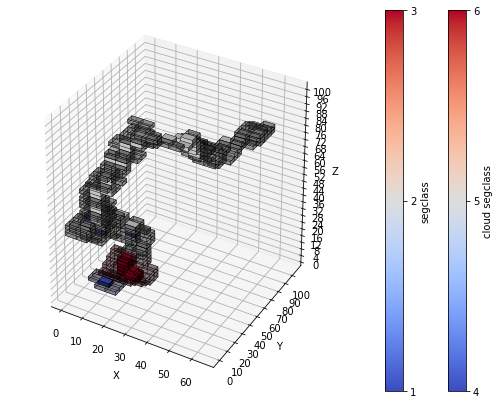

In [15]:
plot_cloud_voxels(beersh_voxels_2mm[beersh_voxels_2mm.dataset_id == 3056], [5, 5, 2], opacity = [1, 0.3])

In [17]:
plot_cloud_voxels_and_hits?

In [19]:
dat_id = 3056

<IPython.core.display.Javascript object>


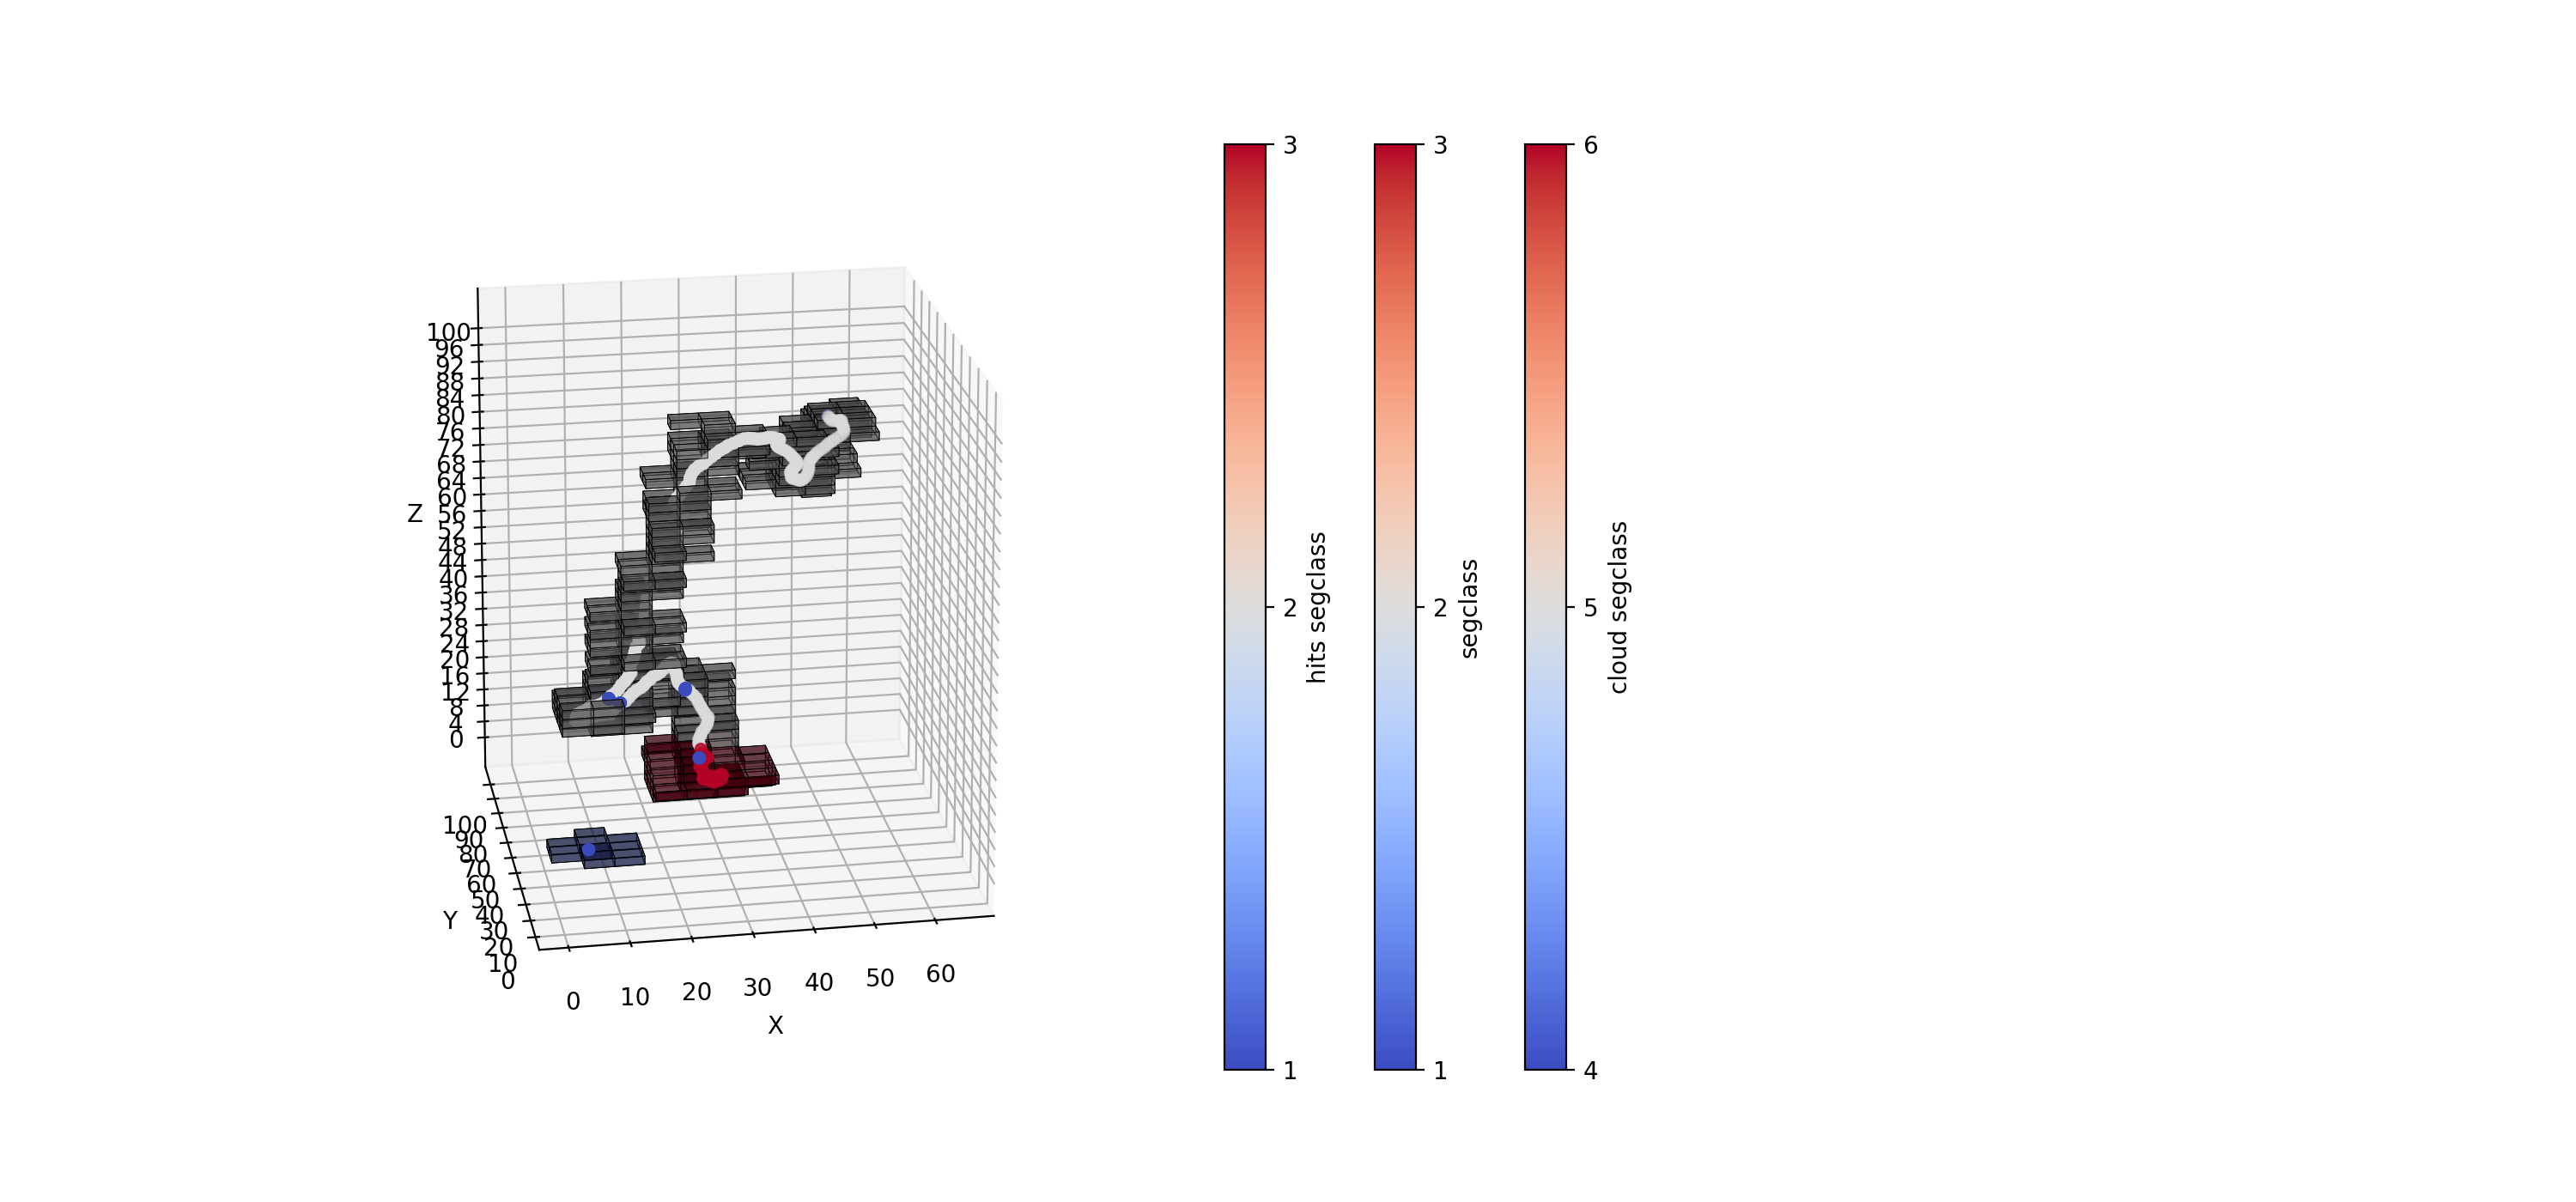

In [23]:
%matplotlib notebook
plot_cloud_voxels_and_hits(beersh_voxels_2mm[beersh_voxels_2mm.dataset_id == dat_id], MC_hits_2mm[MC_hits_2mm.dataset_id == dat_id], [5, 5, 2], opacity=[0.5, 0.5])